# Display Matched Molecules
See the molecules which are closest in context in our known set from both the "relevant" and "random" populations

In [1]:
from pymongo import MongoClient
from rdkit.Chem import Draw
from rdkit import Chem
import pandas as pd

Configuration

In [2]:
to_display = 10

## Load the Matches
They are stored in CSV files produced by Zhi Hong.

In [3]:
relevant = pd.read_csv('matched/Known-Relevant_ENA-molecules-cosine-all.csv')

In [4]:
random = pd.read_csv('matched/Known-Random_Valid-molecules-cosine-all.csv')

## Find the Closest Matches
Find the things that are closest to the known molecules in the dataset

In [5]:
top_relevant = relevant.sort_values('Cosine Similarity', ascending=False).drop_duplicates('Random Valid Molecule', keep='first').head(to_display)
top_random = random.sort_values('Cosine Similarity', ascending=False).drop_duplicates('Random Valid Molecule', keep='first').head(to_display)

## Get their Smiles Strings
Look that up from the database

In [6]:
client = MongoClient(port=27856)
coll = client['cfree']['molecule_record']

Get them via projection

In [7]:
def find_smiles(key):
    """Get the record matching a certain InChI Key and return the smiles"""
    return coll.find_one({'_id': key})['identifier']['smiles']

In [8]:
top_random.head(1)

,Known Molecule,Cosine Similarity,Random Valid Molecule
4551,NSPMIYGKQJPBQR-UHFFFAOYSA-N,0.926603,PBKONEOXTCPAFI-UHFFFAOYSA-N


In [9]:
for data in [top_relevant, top_random]:
    for col in ['Known Molecule', 'Random Valid Molecule']:
        data[f'{col}-SMILES'] = data[col].apply(find_smiles)

## Render them as Plots
Top line will be the known and bottom the matched molecule

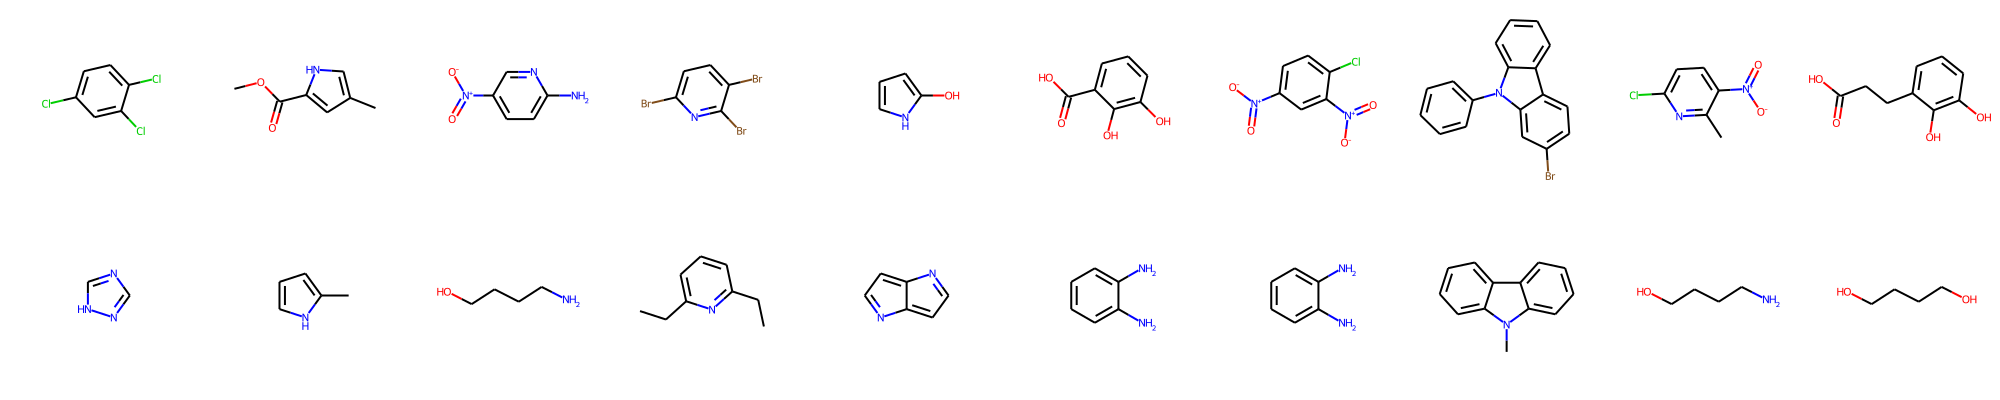

In [10]:
Draw.MolsToGridImage(top_random['Random Valid Molecule-SMILES'].apply(Chem.MolFromSmiles).tolist() + 
                     top_random['Known Molecule-SMILES'].apply(Chem.MolFromSmiles).tolist(), molsPerRow=to_display)

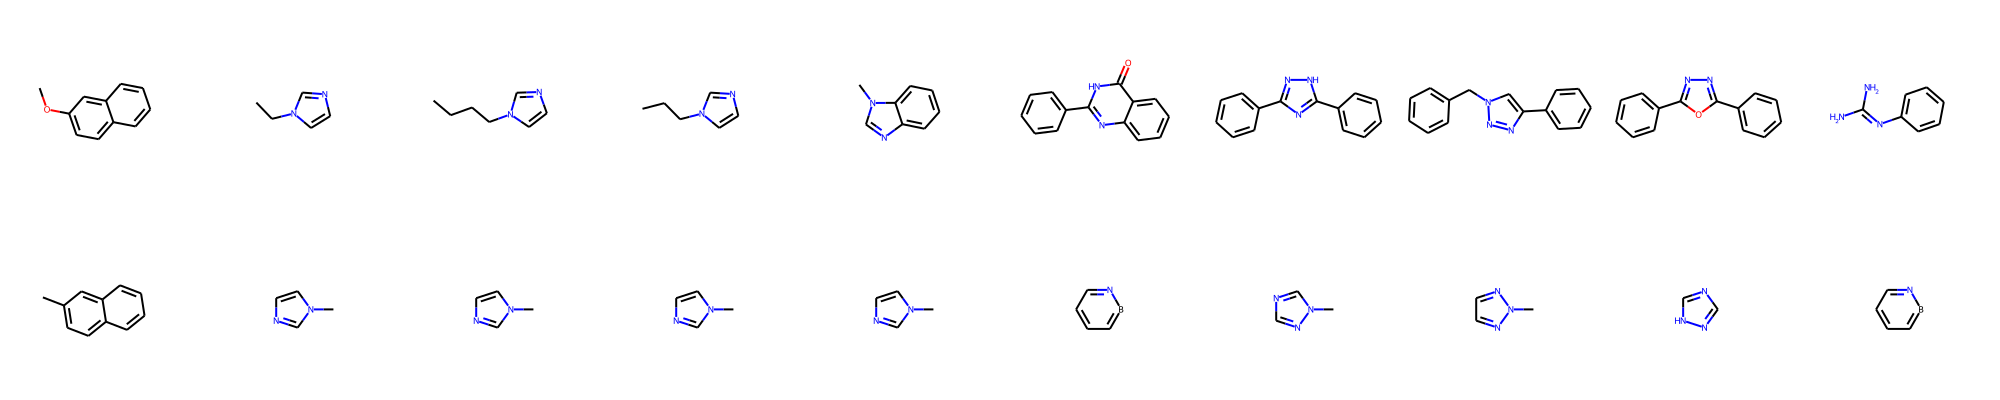

In [11]:
Draw.MolsToGridImage(top_relevant['Random Valid Molecule-SMILES'].apply(Chem.MolFromSmiles).tolist() + 
                     top_relevant['Known Molecule-SMILES'].apply(Chem.MolFromSmiles).tolist(), molsPerRow=to_display)